In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

### Search Using a Keyword

### data request

In [78]:

pytrend=TrendReq(hl="en-us",tz=360)
keyword="Artificial Intelligence"

In [79]:
pytrend.build_payload([keyword],cat=0,timeframe="today 12-m",geo="",gprop="")

### Country wise interest

In [80]:
region_interest=pytrend.interest_by_region()
region_interest=region_interest.sort_values(by=keyword,ascending=False).head(10)
#region_interest

### PLOT BARGRAPH

C:\Users\BENASEER PT\AppData\Local\Temp\ipykernel_3560\685120583.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\BENASEER PT\AppData\Local\Temp\ipykernel_3560\685120583.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



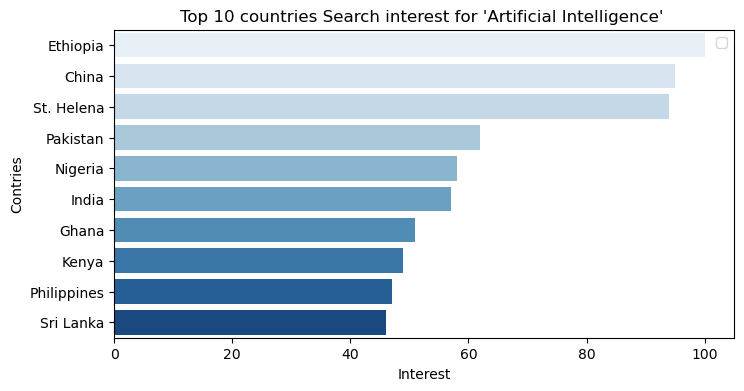

In [81]:
plt.figure(figsize=(8,4))
sns.barplot(x=region_interest[keyword],y=region_interest.index,palette="Blues")
plt.xlabel("Interest")
plt.ylabel("Contries")
plt.title(f"Top 10 countries Search interest for '{keyword}' ")
plt.legend()
plt.grid(False)
plt.show()

### PLOT WORLD MAP

In [82]:
region_interest=region_interest.reset_index()
fig=px.choropleth(
    region_interest,
    locations="geoName",
    locationmode="country names",
    color=keyword,
    color_continuous_scale="Plasma",
    title=(f"Top 10 countries Search interest for '{keyword}' "),
    )
fig.show()

### PLOT LINEGRAPH TO SHOW TIMEWISE INTEREST

C:\Users\BENASEER PT\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



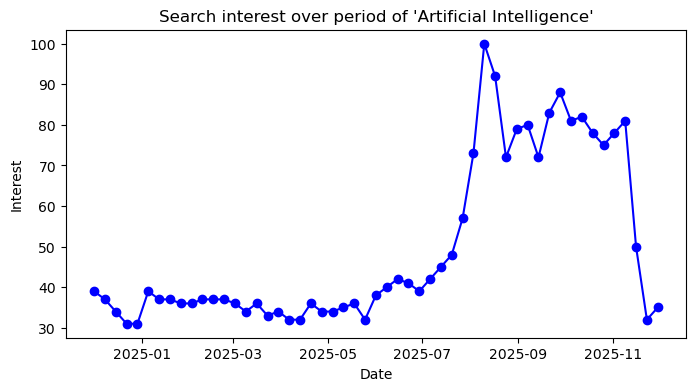

In [83]:
pt_time=pytrend.interest_over_time()
plt.figure(figsize=(8,4))
plt.plot(pt_time.index,pt_time[keyword],color="Blue",marker="o")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.title(f"Search interest over period of '{keyword}'")
plt.show()

In [ ]:
# kw_list = ["Artificial Intelligence", "Cloud computing", "Data Science"]

# plt.figure(figsize=(10,6))

# for kw in kw_list:
#     plt.plot(pt_time.index, pt_time[kw], marker="o", label=kw)

# plt.xlabel("Date")
# plt.ylabel("Interest")
# plt.title("Search interest over the last 12 months")
# plt.legend()
# plt.grid(False)
# plt.show()


In [93]:
kw_list = ["Artificial Intelligence", "Cloud Computing", "Data Science"]
pytrend.build_payload(kw_list,cat=0,geo="",gprop="",timeframe="today 12-m")
pytrend

C:\Users\BENASEER PT\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



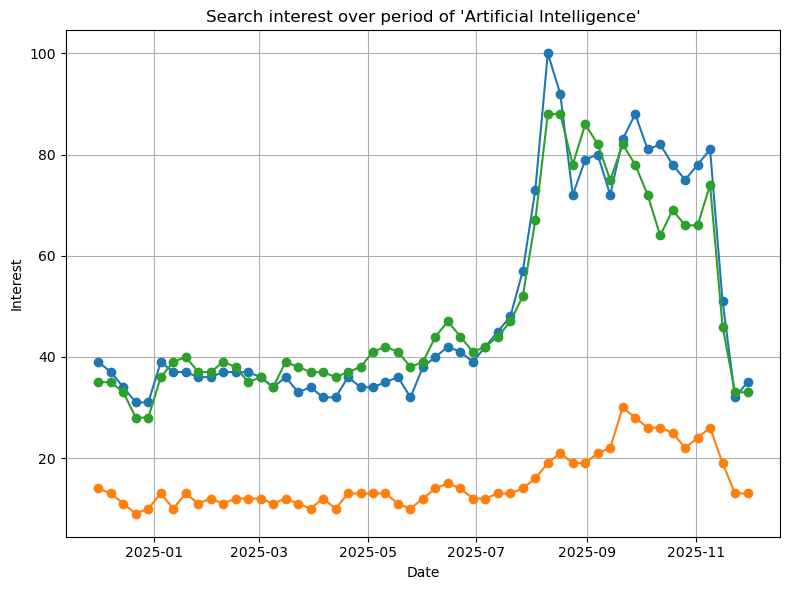

In [96]:
compare_trend=pytrend.interest_over_time()

plt.figure(figsize=(8,6))
for kw in kw_list:
    
    plt.plot(compare_trend.index, compare_trend[kw], marker="o",label=kw)

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title(f"Search interest over period of '{keyword}'")
plt.grid()
plt.tight_layout()
plt.show()